In [1]:
import pandas as pd
credit_data = pd.read_csv("https://storage.googleapis.com/kaggle-forum-message-attachments/237294/7771/german_credit_data.csv")

In [2]:
credit_data.head(100)
# There are 11 attributes
# Attribute "Unamed:0" seems to be used for indexing
# Age: is the age of the person asking for the loan
# Sex: is the sexual orrientation of the person applying 
# Job: is the number of jobs the individual has had
# Housing: describes there living situation 
# Saving accounts: categorical description of the individuals savings amount
# Checking account: categorical description of the individuals checkings amount
# credit amount: Amount the individual is seeking
# Duration: length of the loan
# Purpose: reason the individual is applying for the loan
# Risk: Risk involved with loan


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
5,5,35,male,1,free,NaN,NaN,9055,36,education,good
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,7,35,male,3,rent,little,moderate,6948,36,car,good
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad


In [3]:
credit_data.info()

# There are 1000 instances in the dataset, which means this is a very small dataset
# Saving accounts is missing 183 entries 
# Checking account is missing 394 entries 
# The data set is comprised of numerical and categorical attributes
# aka object is a txt attribute


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB


In [4]:
credit_data["Sex"].value_counts()


male      690
female    310
Name: Sex, dtype: int64

In [5]:
credit_data["Housing"].value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [6]:
credit_data["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [7]:
credit_data["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [8]:
credit_data["Purpose"].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
vacation/others         12
domestic appliances     12
Name: Purpose, dtype: int64

In [9]:
credit_data["Risk"].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [10]:
credit_data.describe()

# The mean age individuals apply is around 35 years old. 
# Youngest individual is 19 and oldest is 75

# The mean number of jobs an individual has had is about 2
# Some individuals had 0 job experience, while others had 3

# The mean credit amount is around 3271 dollars with a payment duration of 20 months


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


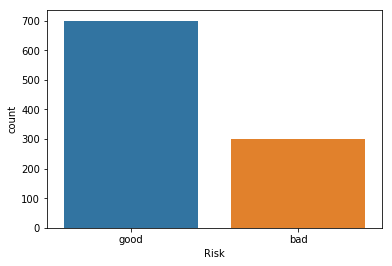

In [21]:
import seaborn as sns
sns.countplot(x = "Risk", data = credit_data)



In [22]:
# Let's create a train and test sets

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(credit_data, test_size = 0.2, random_state = 7)

In [23]:
corr_matrix = credit_data.corr()

corr_matrix["Credit amount"].sort_values(ascending = False)

Credit amount    1.000000
Duration         0.624984
Job              0.285385
Age              0.032716
Unnamed: 0       0.013488
Name: Credit amount, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18291b38>,
      dtype=object)

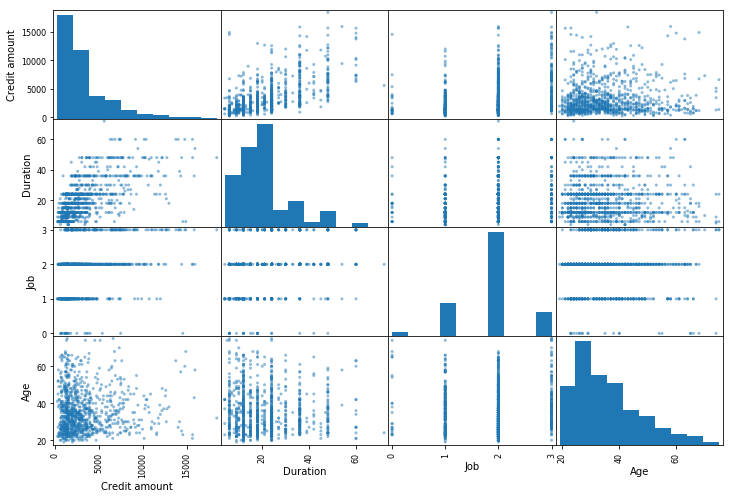

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["Credit amount", "Duration", "Job", "Age"]

scatter_matrix(credit_data[attributes], figsize = (12, 8))
